# Named entity recognition (NER) with human-in-the-loop

18 June 2020  
Kate Riesbeck  

In [1]:
import spacy 
from spacy import displacy 
from IPython.display import Image

**NER** is a subtask of natural language processing.  It locates and classifies entities mentioned in unstructured text into predefined categories.  This helps sort unstructured text and detect important information, which is crucial when dealing with large datasets.

Previously, we implemented NER using a pretrained language model.  We also explored customization via rule-based matching and training a custom model.  More on that here:  [NER in spaCy notebook](https://nbviewer.jupyter.org/github/kriesbeck/spacy-ner/blob/master/NER%20in%20spaCy.ipynb)

In [2]:
# Load a pretrained language model
nlp = spacy.load('en_core_web_sm')

In [3]:
text = """George Washington (February 22, 1732[b] – December 14, 1799) was an American political leader, 
military general, statesman, and founding father who served as the first president of the United States 
from 1789 to 1797. Previously, he led Patriot forces to victory in the nation's War for Independence. 
He presided at the Constitutional Convention of 1787, which established the U.S. Constitution and a federal government. 
Washington has been called the "Father of His Country" for his manifold leadership in the formative days of the new nation.
"""

# Run the text through the pretrained model
doc = nlp(text)

In [4]:
# Use displacy to visualize entities
displacy.render(doc, style='ent', jupyter=True)

#### Implementation issues:

 - Custom model training requires labeled training data
  - a LOT of labeled training data... or does it?
  - annotation is time-consuming and error-prone... or is it?



#### Proposed solutions:

 - Transfer learning

 - Annotation tools and strategies

 - Negative feedback

# Transfer learning

Transfer learning addresses the problem of limited training data in a target domain. 

Pretrained NER models are used as base models which are fine-tuned with few labeled data for recognition of different named entity classes in a target domain.

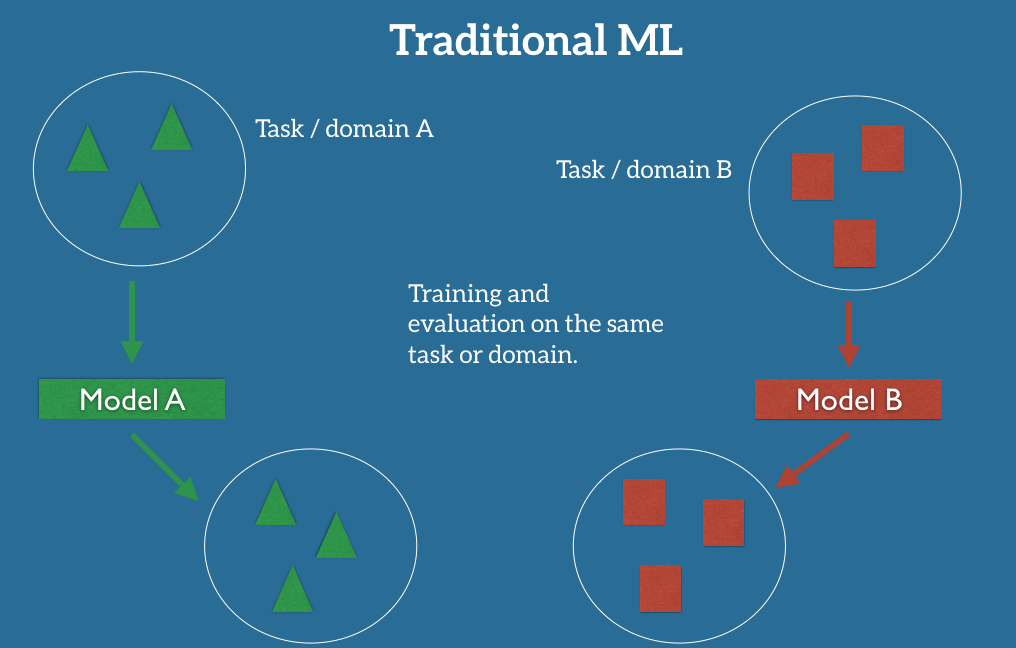

In [5]:
Image("images/traditional_ml_setup.png")

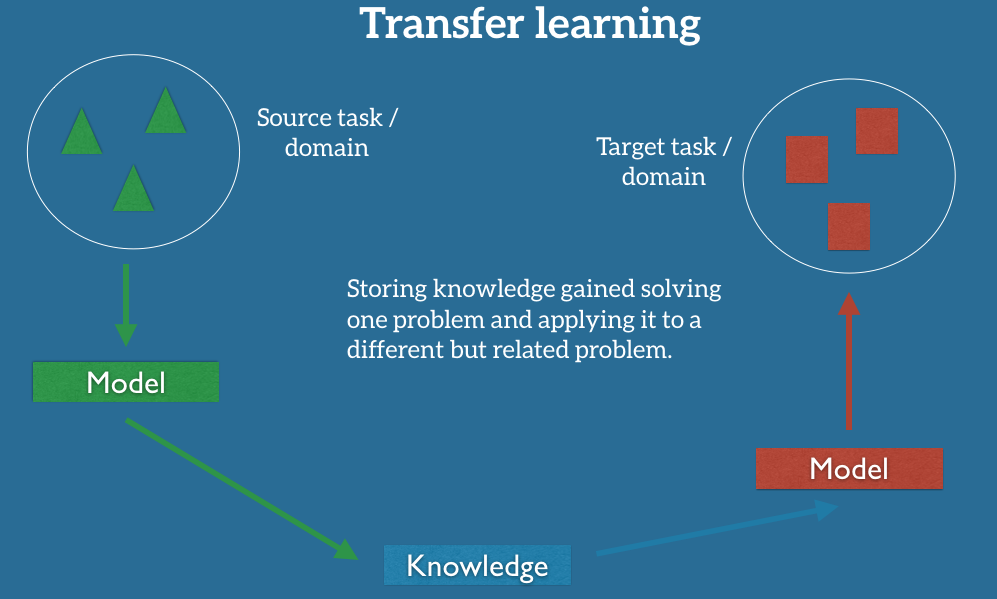

In [6]:
Image("images/transfer_learning_setup.png")

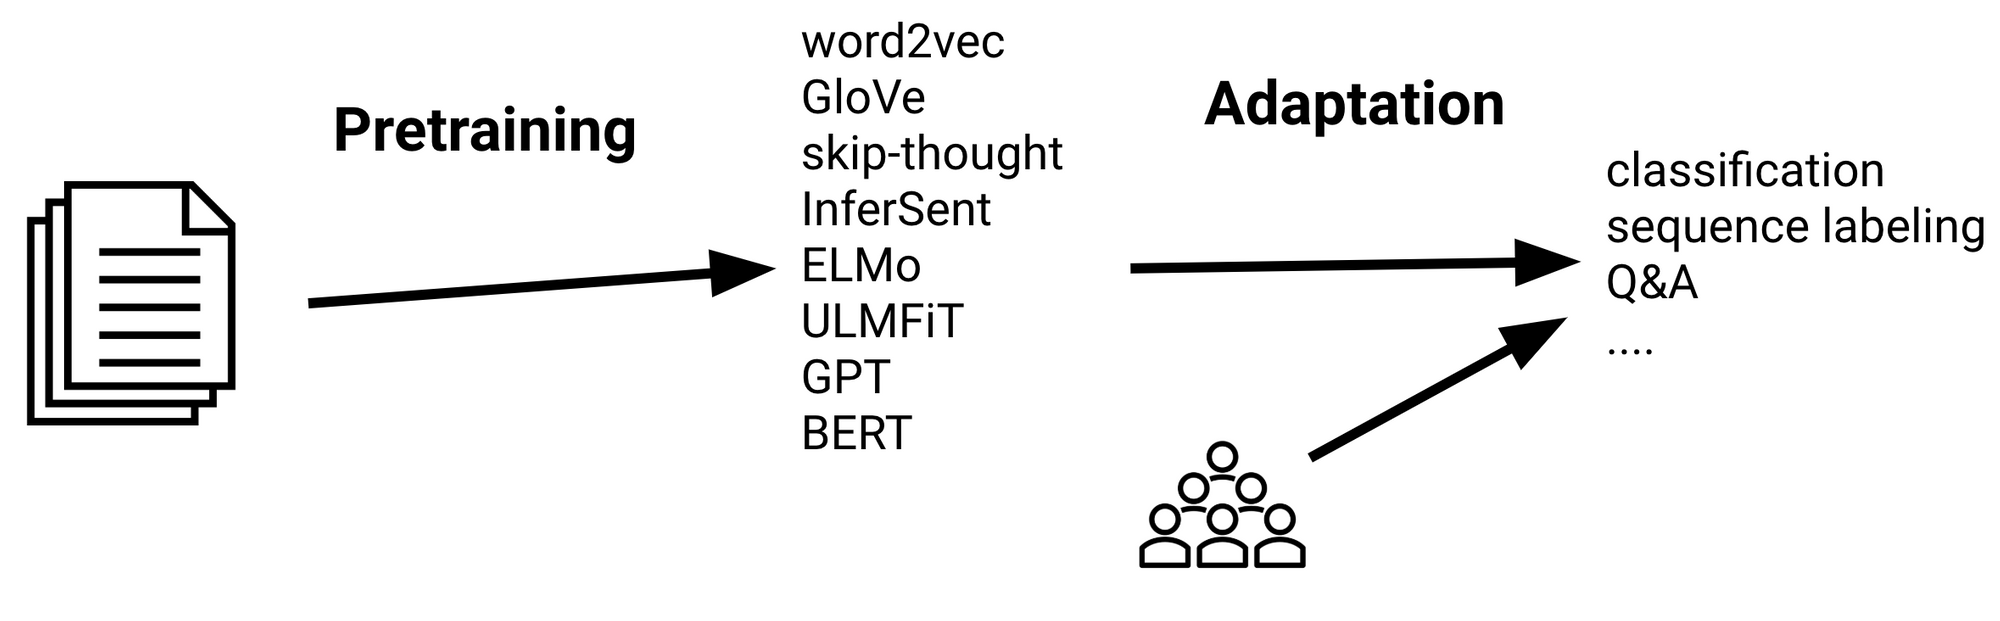

In [7]:
Image("images/pretraining_adaptation.png")

**Transfer learning** allows us to adapt a robust model for a specific domain with few labeled examples (aka "few-shot", "one-shot", or "zero-shot" learning).

# Annotation tools and strategies

### Old school annotation tools

Most annotation tools let you label entities by manually highlighting spans of text.  Here are examples from open-source tools Brat and Doccano.

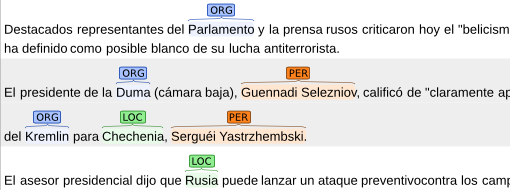

In [8]:
Image("images/brat_annotation.png")

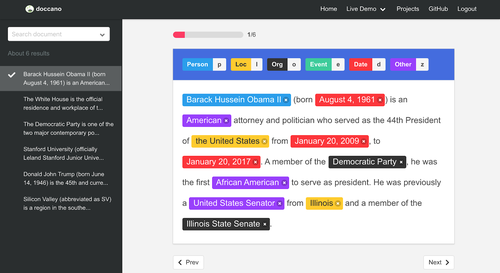

In [9]:
Image("images/doccano_annotation.png")

### Prodigy

Prodigy is an annotation tool from the company that makes spaCy.  It's not open-source, but it's affordable (~$500 per developer per year, unlimited annotators).

Prodigy uses active learning -- it only asks for annotations it is unsure about.  Unlike other annotation tools, it's designed to help the annotator focus on one decision at a time.



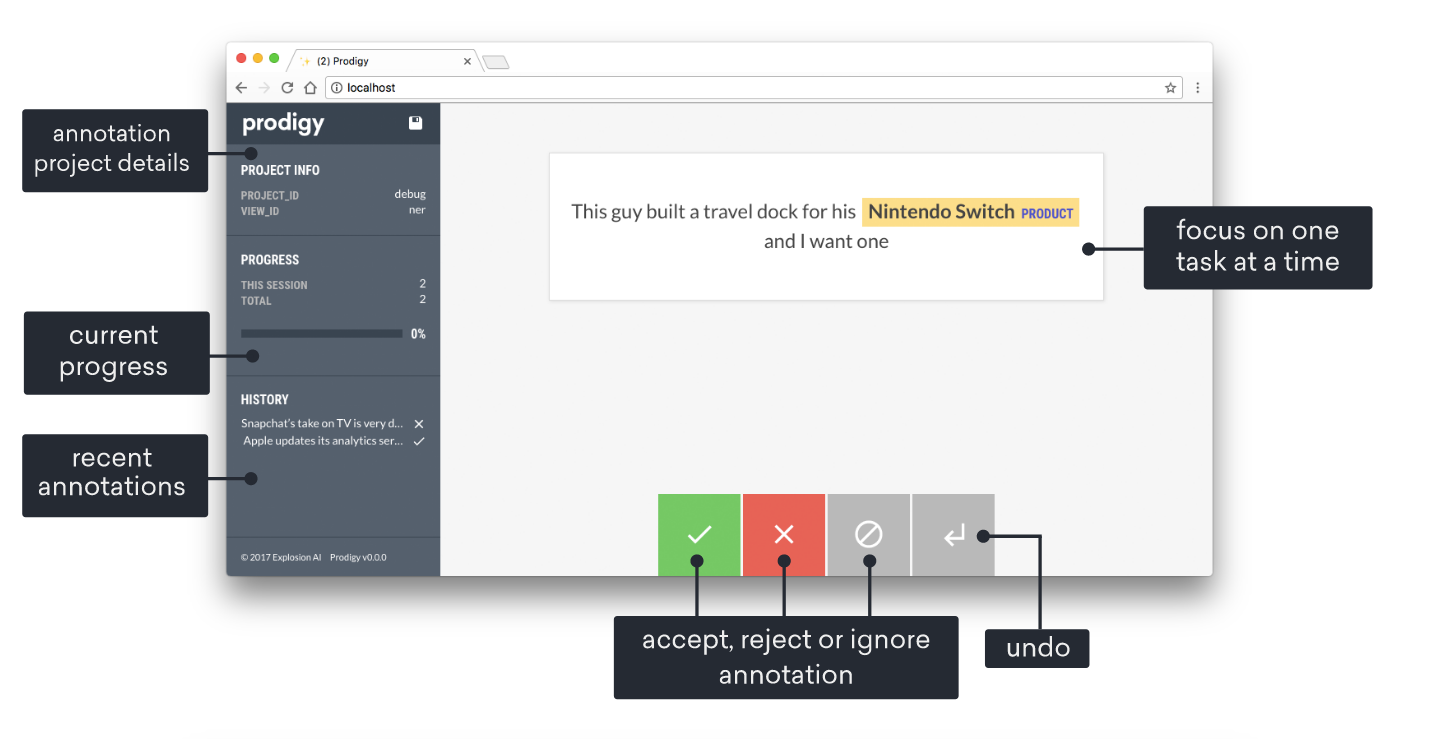

In [10]:
Image("images/prodigy_binary.png")

### Annotation strategies

- Manual annotation with model suggestions
- Binary decisionmaking
- Grouping
- Uncertainty sampling

# Negative feedback

Because our production model is based pre-deﬁned dataset, it can be difﬁcult to recognize new entities.  

A human-in-the-loop based approach allows users to highlight entities unrecognized by the model.  This negative feedback triggers updates to both the training dataset and the model.

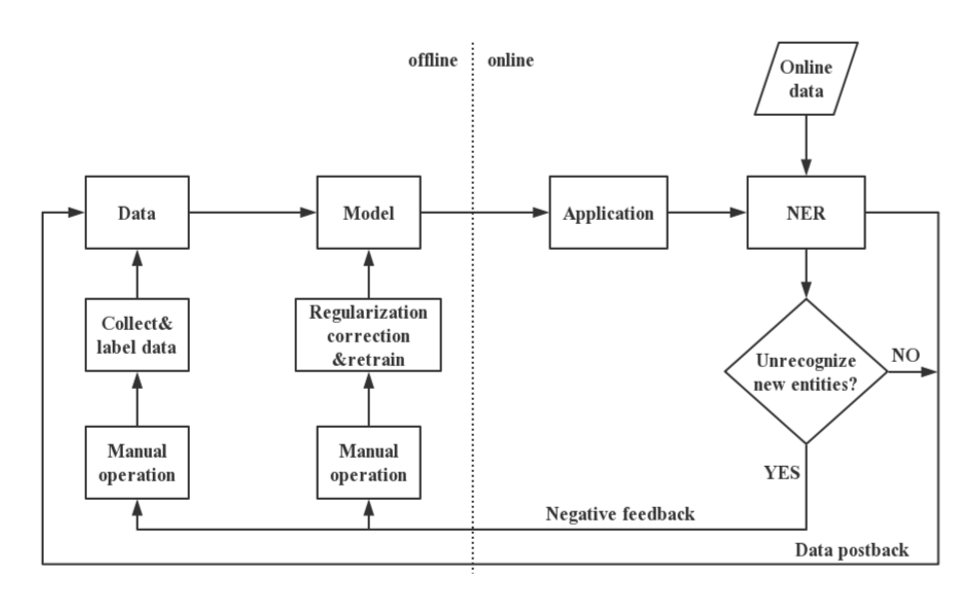

In [11]:
Image("images/negative_feedback.png")

# Proposed approach

- Use the **negative feedback** approach to trigger manual annotation and model retraining
- Use **annotation strategies** like grouping and uncertainty sampling in a user-friendly **annotation tool**
- Use **transfer learning** to retrain existing model 

# Next steps

- Code mock-up

# Questions
- Can we get Prodigy onsite?

# Resources

2020 "Training a NER Model with Prodigy and Transfer Learning" https://youtu.be/59BKHO_xBPA  
2020 "A Human-in-the-Loop Method for Developing Machine Learning Applications"  
2020 "Transfer Learning for Industrial Applications of NER"  
2019 "The State of Transfer Learning in NLP"  
2019 "Transfer Learning for Named Entity Recognition in Financial and Biomedical Documents"   
2019 "Lessons from Human-in-the-Loop Entity Extraction"  
2019 "Improving NER using Deep Learning with Human-in-the-Loop"  
2019 "Active Learning with Partial Feedback"  
2018 "Neural Adaptation Layers for Cross-domain Named Entity Recognition"